In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import re
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [59]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Embedding, Bidirectional

In [ ]:
X_train = pd.read_csv('/content/drive/MyDrive/ML_Project/data/fake-news/text_seq_data/word_seq_train.csv')
X_test = pd.read_csv('/content/drive/MyDrive/ML_Project/data/fake-news/text_seq_data/word_seq_test.csv')
X_valid = pd.read_csv('/content/drive/MyDrive/ML_Project/data/fake-news/text_seq_data/word_seq_valid.csv')

y_train = pd.read_csv('/content/drive/MyDrive/ML_Project/data/fake-news/label_seq_data/train_label.csv')
y_test = pd.read_csv('/content/drive/MyDrive/ML_Project/data/fake-news/label_seq_data/test_label.csv')
y_valid = pd.read_csv('/content/drive/MyDrive/ML_Project/data/fake-news/label_seq_data/valid_label.csv')

vocab_size = int(np.loadtxt('/content/drive/MyDrive/ML_Project/data/fake-news/vocab_size_text.txt'))

In [ ]:
print(vocab_size)

193874


In [ ]:
X_train.shape, X_test.shape, X_valid.shape

((10942, 1200), (3652, 1200), (3617, 1200))

# LSTM

The LSTM model includes:
- a layer of embeddings, 
- Dropout(0.2), 
- LSTM(4), 
- Dropout(0.3), 
- fully connected layer with 100 units and activation function ReLu,
- Dropout(0.4) and fully connected layer with activation function sigmoid. 

LSTM network was trained on full-text data using the first 1200 words of the articles (because of memory limitations).

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, input_length=1200, output_dim=4))
model.add(Dropout(rate=0.2))
model.add(LSTM(units=4))
model.add(Dropout(rate=0.3))
model.add(Dense(units=100,  activation='relu'))
model.add(Dropout(rate=0.4))
model.add(Dense(units=2, activation='sigmoid'))

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 1200, 4)           775496    
                                                                 
 dropout_15 (Dropout)        (None, 1200, 4)           0         
                                                                 
 lstm_6 (LSTM)               (None, 4)                 144       
                                                                 
 dropout_16 (Dropout)        (None, 4)                 0         
                                                                 
 dense_12 (Dense)            (None, 100)               500       
                                                                 
 dropout_17 (Dropout)        (None, 100)               0         
                                                                 
 dense_13 (Dense)            (None, 2)                

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(
    X_train, 
    y_train, 
    validation_data=[X_valid, y_valid],
    epochs = 10
)

Epoch 1/10
342/342 [==============================] - 178s 514ms/step - loss: 0.4583 - accuracy: 0.7695 - val_loss: 0.2444 - val_accuracy: 0.9093
Epoch 2/10
342/342 [==============================] - 176s 515ms/step - loss: 0.1745 - accuracy: 0.9421 - val_loss: 0.1787 - val_accuracy: 0.9359
Epoch 3/10
342/342 [==============================] - 176s 514ms/step - loss: 0.0845 - accuracy: 0.9760 - val_loss: 0.1973 - val_accuracy: 0.9425
Epoch 4/10
342/342 [==============================] - 175s 512ms/step - loss: 0.0645 - accuracy: 0.9814 - val_loss: 0.3304 - val_accuracy: 0.8723
Epoch 5/10
342/342 [==============================] - 175s 511ms/step - loss: 0.1043 - accuracy: 0.9758 - val_loss: 0.2006 - val_accuracy: 0.9301
Epoch 6/10
342/342 [==============================] - 175s 512ms/step - loss: 0.0338 - accuracy: 0.9899 - val_loss: 0.2455 - val_accuracy: 0.9400
Epoch 7/10
342/342 [==============================] - 174s 508ms/step - loss: 0.0251 - accuracy: 0.9929 - val_loss: 0.2755 -

In [ ]:
y_probas = model.predict(X_test)
y_pred = y_probas.argmax(axis=-1)

In [ ]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      2042
           1       0.92      0.95      0.94      1610

    accuracy                           0.94      3652
   macro avg       0.94      0.94      0.94      3652
weighted avg       0.94      0.94      0.94      3652



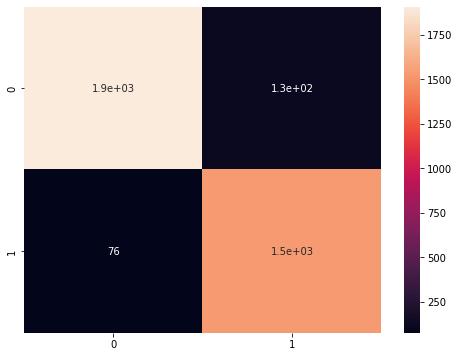

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8, 6))
sns.heatmap(cm, annot = True)
plt.show()

# Bi-LSTM

The Bi-LSTM model includes:
- a layer of embeddings, 
- Dropout(0.2), 
- Bi-LSTM(4), 
- Dropout(0.3), 
- fully connected layer with 100 units and activation function ReLu,
- Dropout(0.4) and fully connected layer with activation function sigmoid. 

Bi-LSTM network was trained on full-text data using the first 1200 words of the articles (because of memory limitations).

In [60]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, input_length=1200, output_dim=4))
model.add(Dropout(rate=0.2))
model.add(Bidirectional(LSTM(units=4)))
model.add(Dropout(rate=0.3))
model.add(Dense(units=100,  activation='relu'))
model.add(Dropout(rate=0.4))
model.add(Dense(units=2, activation='sigmoid'))

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 1200, 4)           775496    
                                                                 
 dropout_18 (Dropout)        (None, 1200, 4)           0         
                                                                 
 bidirectional (Bidirectiona  (None, 8)                288       
 l)                                                              
                                                                 
 dropout_19 (Dropout)        (None, 8)                 0         
                                                                 
 dense_14 (Dense)            (None, 100)               900       
                                                                 
 dropout_20 (Dropout)        (None, 100)               0         
                                                     

In [61]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [62]:
history = model.fit(
    X_train, 
    y_train, 
    validation_data=[X_valid, y_valid],
    epochs = 10
)

Epoch 1/10
342/342 [==============================] - 297s 855ms/step - loss: 0.4903 - accuracy: 0.7436 - val_loss: 0.2431 - val_accuracy: 0.9113
Epoch 2/10
342/342 [==============================] - 290s 849ms/step - loss: 0.3342 - accuracy: 0.8640 - val_loss: 0.3906 - val_accuracy: 0.8349
Epoch 3/10
342/342 [==============================] - 292s 853ms/step - loss: 0.1926 - accuracy: 0.9286 - val_loss: 0.1911 - val_accuracy: 0.9320
Epoch 4/10
342/342 [==============================] - 293s 858ms/step - loss: 0.1094 - accuracy: 0.9636 - val_loss: 0.2157 - val_accuracy: 0.9157
Epoch 5/10
342/342 [==============================] - 292s 854ms/step - loss: 0.0689 - accuracy: 0.9789 - val_loss: 0.2317 - val_accuracy: 0.9289
Epoch 6/10
342/342 [==============================] - 292s 855ms/step - loss: 0.0494 - accuracy: 0.9844 - val_loss: 0.2286 - val_accuracy: 0.9295
Epoch 7/10
342/342 [==============================] - 293s 857ms/step - loss: 0.0337 - accuracy: 0.9896 - val_loss: 0.2597 -

In [63]:
y_probas = model.predict(X_test)
y_pred = y_probas.argmax(axis=-1)

In [64]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      2042
           1       0.88      0.92      0.90      1610

    accuracy                           0.91      3652
   macro avg       0.91      0.91      0.91      3652
weighted avg       0.91      0.91      0.91      3652



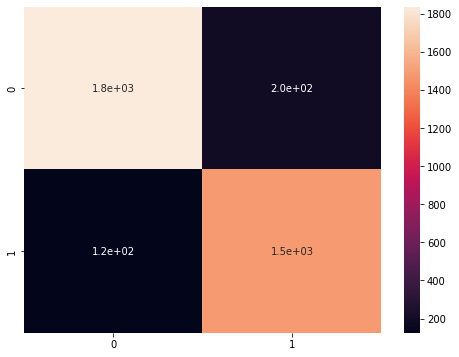

In [65]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8, 6))
sns.heatmap(cm, annot = True)
plt.show()